In [7]:
import numpy as np
from scipy.spatial import distance

In [5]:
distance.euclidean(np.array([1, 4]), np.array([7, 12]))

10.0

In [9]:
distance.cityblock(np.array([1, 4]), np.array([7, 12]))

14

## Внутренние меры

### Индекс Калински - Харабаса

In [10]:
from sklearn.metrics import calinski_harabasz_score
# calinski_harabasz_score(X, labels)

### Индекс Дэвиса - Болдина

In [11]:
from sklearn.metrics import davies_bouldin_score
# davies_bouldin_score(X, labels)

## Внешние меры

Используются дополнительные показатели для оценки качества при наличии разметки.

### Индекс Рэнда

In [1]:
from sklearn.metrics import rand_score
# rand_score(labels_true, labels_pred)

In [2]:
rand_score([1, 1, 1, 2, 2], [1, 1, 2, 2, 3])

0.6

### Скорректированный индекс Рэнда

In [3]:
from sklearn.metrics import adjusted_rand_score
# sklearn.metrics.adjusted_rand_score(labels_true, labels_pred)

### Нормализованная взаимная информация

In [4]:
from sklearn.metrics import normalized_mutual_info_score
# normalized_mutual_info_score(labels_true, labels_pred, *, average_method='arithmetic')

### Однородность

In [5]:
from sklearn.metrics import homogeneity_score
# homogeneity_score(labels_true, labels_pred)

### Полнота

In [6]:
from sklearn.metrics import completeness_score
# completeness_score(labels_true, labels_pred)

### V - мера

In [7]:
from sklearn.metrics import v_measure_score
# v_measure_score(labels_true, labels_pred, *, beta=1.0)

In [10]:
beta = 1
homogeneity = 0.7
completeness = 0.35
v = (1 + beta) * homogeneity * completeness / (beta * homogeneity + completeness)
round(v, 2)

0.47

### Меры качества кластеризации. Практика

In [1]:
import numpy as np

X_train = np.loadtxt('./train.txt')
y_train = np.loadtxt('./train_labels.txt')

X_test = np.loadtxt('./test.txt')
y_test = np.loadtxt('./test_labels.txt')

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

X.shape

(10299, 561)

In [21]:
y

array([5., 5., 5., ..., 2., 2., 2.])

In [22]:
np.unique(y)

array([1., 2., 3., 4., 5., 6.])

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
X_norm[0][0]

0.2105338541767611

In [25]:
list(range(2, 10))

[2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters = , random_state = 42)

In [4]:
import pandas as pd
df = pd.DataFrame(columns = ['SILScore', 'CHScore', 'DBScore', 'CLUST_NUM'])
df

/home/gkuznetsov@prominn.local/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,SILScore,CHScore,DBScore,CLUST_NUM


In [12]:
from sklearn.metrics import silhouette_score #(X, labels), -> max
from sklearn.metrics import calinski_harabasz_score # -> max
from sklearn.metrics import davies_bouldin_score # -> min


for clust_num in range(2, 10):
    kmeans = KMeans(random_state = 42, n_clusters = clust_num)
    kmeans.fit(X_norm)
    df.loc[len(df.index)] = [silhouette_score(X = X_norm, labels = kmeans.labels_),
                            calinski_harabasz_score(X = X_norm, labels = kmeans.labels_),
                            davies_bouldin_score(X = X_norm, labels = kmeans.labels_),
                            clust_num]

In [13]:
df.round({
    'SILScore': 2,
    'CHScore': 2,
    'DBScore': 2
})

,SILScore,CHScore,DBScore,CLUST_NUM
0,0.39,7880.81,1.07,2.0
1,0.32,5034.48,1.79,3.0
2,0.15,3696.34,2.34,4.0
3,0.13,3027.08,2.43,5.0
4,0.11,2556.77,2.37,6.0
5,0.09,2216.56,2.68,7.0
6,0.08,1974.97,2.61,8.0
7,0.08,1790.95,2.58,9.0


In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score

df = pd.DataFrame(columns = ['HOMOGEN', 'COMPLET', 'ARS'])
kmeans = KMeans(random_state = 42, n_clusters = 6, init = 'random')
kmeans.fit(X_norm)
df.loc[len(df.index)] = [homogeneity_score(y, kmeans.labels_),
                        completeness_score(y, kmeans.labels_),
                        adjusted_rand_score(y, kmeans.labels_)]

df.round(2)

,HOMOGEN,COMPLET,ARS
0,0.54,0.58,0.42


In [8]:
from collections import Counter
cnt = Counter(kmeans.labels_)

In [9]:
cnt

Counter({5: 2627, 0: 1349, 2: 1647, 1: 2472, 3: 1926, 4: 278})

In [13]:
#создаём таблицу сопряжённости
ct = pd.crosstab(y, kmeans.labels_)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,7))

In [14]:
ct #как алгоритм разобьёт активности по кластерам

,1,2,3,4,5,6
ходьба,0,0,903,78,741,0
подъём,0,0,1242,5,295,2
спуск,0,0,321,196,889,0
сидение,91,1238,1,0,0,447
стояние,0,1346,0,0,0,560
лежание,1556,54,5,0,0,329


In [16]:
kmeans = KMeans(random_state = 42, n_clusters = 2, init = 'random')
kmeans.fit(X_norm)
crosstab = pd.crosstab(y, kmeans.labels_)
crosstab.index = ['ХОД', 'ПОД', 'СПУСК', 'СИД', 'СТОЯ', 'ЛЕЖ']
crosstab.columns = list(range(1, 3))

crosstab #разбиение на два кластера вполннее разумно: неподвижные и подвижные

,1,2
ХОД,1722,0
ПОД,1536,8
СПУСК,1406,0
СИД,3,1774
СТОЯ,0,1906
ЛЕЖ,12,1932


In [18]:
completeness_score(y, kmeans.labels_)

0.979530559699631

In [21]:
from sklearn.cluster import AgglomerativeClustering
clust = AgglomerativeClustering(n_clusters = 2)
clust.fit(X_norm)
completeness_score(y, clust.labels_)

0.9999999999999993

## PCA

In [22]:
import numpy as np
import pandas as pd
A = np.matrix([[1,2,3,4],
               [5,5,6,7],
               [1,4,2,3],
               [5,3,2,1],
               [8,1,2,2]])

df = pd.DataFrame(A, columns  = ['x1','x2','x3','x4'])
df_std  = (df - df.mean()) / (df.std())

In [23]:
df

,x1,x2,x3,x4
0,1,2,3,4
1,5,5,6,7
2,1,4,2,3
3,5,3,2,1
4,8,1,2,2


In [24]:
df_std #для каждого признака среднее арифметическое = 0, стандартное отклонение и дисперсия = 1

,x1,x2,x3,x4
0,-1.000000,-0.632456,0.000000,0.260623
1,0.333333,1.264911,1.732051,1.563740
2,-1.000000,0.632456,-0.577350,-0.173749
3,0.333333,0.000000,-0.577350,-1.042493
4,1.333333,-1.264911,-0.577350,-0.608121


In [25]:
#ковариационная матрица
cov_mat = np.cov(df_std.T)
cov_mat

array([[ 1.        , -0.31622777,  0.04811252, -0.18098843],
       [-0.31622777,  1.        ,  0.63900965,  0.61812254],
       [ 0.04811252,  0.63900965,  1.        ,  0.94044349],
       [-0.18098843,  0.61812254,  0.94044349,  1.        ]])

In [26]:
#собственные значения и собственные вектора
eigen_val, eigen_vectors = np.linalg.eig(cov_mat)

In [27]:
#две компоненты -> выбираем два собственных вектора, с наибольшими собственными значениями
eigen_val

array([2.51579324, 1.0652885 , 0.39388704, 0.02503121])

In [28]:
eigen_vectors # перемножаем матрицу стандартизированных признаков на матрицу с собственными векторами

array([[ 0.16195986, -0.91705888, -0.30707099,  0.19616173],
       [-0.52404813,  0.20692161, -0.81731886,  0.12061043],
       [-0.58589647, -0.3205394 ,  0.1882497 , -0.72009851],
       [-0.59654663, -0.11593512,  0.44973251,  0.65454704]])

In [29]:
from sklearn.decomposition import PCA
#определяем метод главных компонент с двумя компонентами
pca = PCA(n_components=2)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(df_std)

In [30]:
principalComponents

array([[-1.40033078e-02,  7.55974765e-01],
       [ 2.55653399e+00, -7.80431775e-01],
       [ 5.14801919e-02,  1.25313470e+00],
       [-1.01415002e+00,  2.38808310e-04],
       [-1.57986086e+00, -1.22891650e+00]])

### Задание 5.1

In [32]:
vec1 = np.array([3, 4, 1])
vec2 = np.array([1, 6, 2])

In [33]:
np.cov([vec1, vec2])

array([[2.33333333, 2.5       ],
       [2.5       , 7.        ]])

In [35]:
sum(sum(np.cov([vec1, vec2])))

14.333333333333332

### Задание 5.5

In [44]:
A = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])

In [37]:
A

matrix([[ 8,  7,  2,  9],
        [ 1,  3,  6,  3],
        [ 7,  2,  0,  3],
        [10,  3,  1,  1],
        [ 8,  1,  3,  4]])

In [45]:
df = pd.DataFrame(A)

In [46]:
df_std  = (df - df.mean()) / (df.std())

In [47]:
pca = PCA(n_components = 0.9)

In [48]:
pcomp = pca.fit_transform(df_std)

In [49]:
pcomp # 3 компоненты

array([[-1.61145254,  1.76368007,  0.01320928],
       [ 2.08441051,  1.01724955, -0.24417084],
       [-0.29568142, -0.95946326, -0.05272576],
       [-0.50390826, -1.24373821, -0.50808763],
       [ 0.3266317 , -0.57772816,  0.79177495]])

### Сингулярное разложение

In [52]:
# создаём объект класса TruncatedSVD
from sklearn.decomposition import TruncatedSVD

In [ ]:
# n_components — размерность нового пространства, n_iter — количество итераций
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
# обучаем модель на данных X
svd.fit(X)
# применяем уменьшение размерности к матрице X
transformed = svd.transform(data)

### t-SNE

In [ ]:
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE
# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и применяем к матрице X уменьшение размерности
tsne.fit_transform(X)

## Снижение размерности. Практика

In [1]:
import pandas as pd
country_data = pd.read_csv('./Country-data.csv')

/home/gkuznetsov@prominn.local/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [4]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
country_data['life_expec'].max()

82.8

In [9]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [2]:
X = country_data.drop(labels = ['country'], axis = 1)

In [3]:
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()
st_scaler.fit(X = X)
st_data = st_scaler.transform(X)

In [15]:
st_data[0][0].round(2)

1.29

Нет смысла использовать сильно связанные друг с другом признаки, так как их можно будет преобразовать в один, уменьшив таким образом общее количество признаков

In [18]:
country_data.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


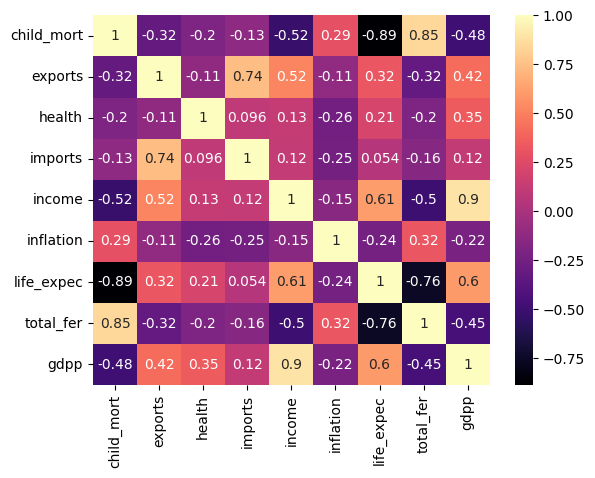

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(country_data.corr(), annot=True, fmt='.2g', cmap='magma')
plt.show()

In [26]:
country_data.corr().max()

child_mort    1.0
exports       1.0
health        1.0
imports       1.0
income        1.0
inflation     1.0
life_expec    1.0
total_fer     1.0
gdpp          1.0
dtype: float64

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9)
principalComponents = pca.fit_transform(st_data)

In [28]:
principalComponents

array([[-2.91302459e+00,  9.56205755e-02, -7.18118495e-01,
         1.00525464e+00, -1.58310044e-01],
       [ 4.29911330e-01, -5.88155666e-01, -3.33485505e-01,
        -1.16105859e+00,  1.74677321e-01],
       [-2.85225077e-01, -4.55174413e-01,  1.22150481e+00,
        -8.68114503e-01,  1.56474647e-01],
       [-2.93242265e+00,  1.69555507e+00,  1.52504374e+00,
         8.39625014e-01, -2.73208934e-01],
       [ 1.03357587e+00,  1.36658709e-01, -2.25720917e-01,
        -8.47062687e-01, -1.93006961e-01],
       [ 2.24072616e-02, -1.77918658e+00,  8.69997116e-01,
        -3.69668667e-02,  9.81056507e-01],
       [-1.01583737e-01, -5.68251724e-01,  2.42091816e-01,
        -1.46626576e+00, -5.59924282e-02],
       [ 2.34216461e+00, -1.98845915e+00,  1.90344188e-01,
         1.10503778e+00, -7.31192330e-01],
       [ 2.97376366e+00, -7.34688659e-01, -5.19766356e-01,
         1.20544210e+00,  8.35797058e-02],
       [-1.81486997e-01, -4.02865873e-01,  8.67458743e-01,
        -4.38772983e-01

Какую долю дисперсии объясняет первая главная компонента среди полученных главных компонент

In [29]:
pca.explained_variance_ratio_[0]

0.4595173978609596

При создании компонент с помощью PCA компоненты должны получиться независимыми, то есть мы не должны теперь наблюдать высоких коэффициентов корреляции. Проверим.

In [5]:
data_corr = pd.DataFrame(principalComponents)

In [6]:
data_corr

,0,1,2,3,4
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581
164,0.498524,1.390744,-0.238526,-1.074098,1.176081
165,-1.887451,-0.109453,1.109752,0.056257,0.618365


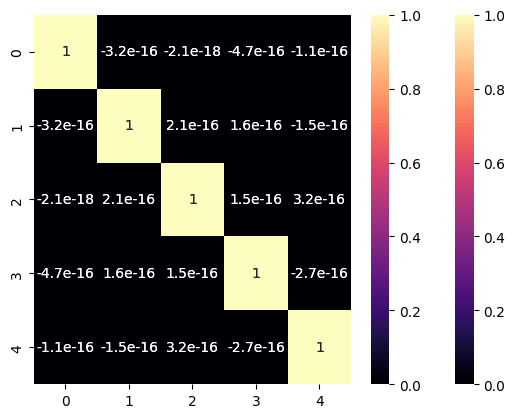

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data_corr.corr(), annot=True, fmt='.2g', cmap='magma')
plt.show()

Теперь у нас пять независимых признаков, объясняющих до 90% дисперсии.

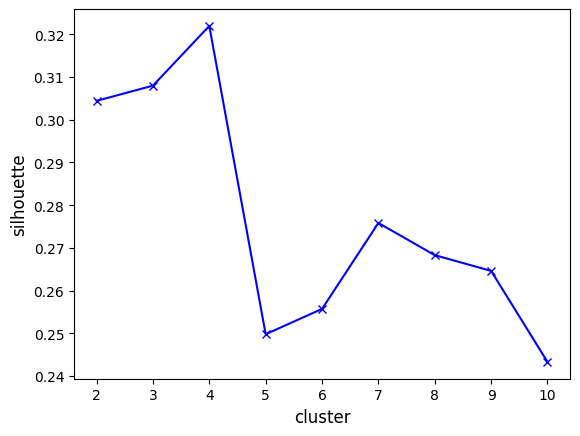

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def get_silhouette(cluster_num, X):
    kmeans = KMeans(n_clusters=cluster_num, random_state=1)
    kmeans.fit(X)
    silhouette = silhouette_score(X, kmeans.labels_, metric='euclidean')
    return silhouette

silhouettes = []
for i in range(2, 11):
    silhouettes.append(get_silhouette(i, principalComponents))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 11)], silhouettes, 'xb-')

plt.show()

In [14]:
# показатель детской смертности = CHILD_MORT
# ВВП на душу населения = GDPP
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(principalComponents)
country_data['clust_num'] = kmeans.labels_

In [15]:
data_to_anal = country_data[['child_mort', 'gdpp', 'clust_num']]
data_to_anal

,child_mort,gdpp,clust_num
0,90.2,553,1
1,16.6,4090,0
2,27.3,4460,0
3,119.0,3530,1
4,10.3,12200,0
...,...,...,...
162,29.2,2970,0
163,17.1,13500,0
164,23.3,1310,0
165,56.3,1310,1


In [16]:
data_to_anal.groupby(by = ['clust_num']).mean()

,child_mort,gdpp
clust_num,,
0,21.690588,6519.552941
1,92.961702,1922.382979
2,4.133333,57566.666667
3,5.181250,42118.750000


In [22]:
# продолжительность жизни = LIFE_EXPEC
country_data[country_data['clust_num'] == 1][['country', 'life_expec']].sort_values(by = ['life_expec'])

,country,life_expec
66,Haiti,32.1
87,Lesotho,46.5
31,Central African Republic,47.5
166,Zambia,52.0
94,Malawi,53.1
137,South Africa,54.3
106,Mozambique,54.5
132,Sierra Leone,55.0
64,Guinea-Bissau,55.6
0,Afghanistan,56.2
